<a href="https://www.kaggle.com/code/sjagkoo7/cryptocurrencies-am?scriptVersionId=139573719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crypto/Data.csv


## Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/crypto/Data.csv')

## Data Pre-Processing

In [3]:
df.head(5)

,Rank,Currency_Name,Market_Capital,Price,Circulating_Supply,Volume(24h),Change(24h)
0,1,Bitcoin,6.021918e+10,3631.72,1.658145e+07,1.226800e+09,-0.0084
1,2,Ethereum,2.506128e+10,264.44,9.477220e+07,4.625760e+08,0.0132
2,3,Bitcoin Cash,6.815418e+09,410.47,1.660378e+07,2.608570e+08,-0.0322
3,4,Ripple,6.646330e+09,0.17,3.834384e+10,4.194500e+07,-0.0042
4,5,Dash,2.607961e+09,344.36,7.573378e+06,9.714230e+07,0.0362


In [4]:
df.describe()

,Rank,Market_Capital,Price,Circulating_Supply,Volume(24h),Change(24h)
count,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,50.500000,1.176396e+09,57.707200,1.267059e+10,2.554049e+07,0.013364
std,29.011492,6.537495e+09,367.076192,6.551144e+10,1.342103e+08,0.117435
min,1.000000,1.181625e+07,0.000000,1.978170e+05,4.460000e+03,-0.189500
25%,25.750000,1.736688e+07,0.170000,8.782969e+06,1.273085e+05,-0.027500
50%,50.500000,3.727138e+07,1.260000,5.282238e+07,5.165645e+05,-0.007100
75%,75.250000,1.417055e+08,6.907500,1.746123e+08,2.572122e+06,0.025225
max,100.000000,6.021918e+10,3631.720000,5.845821e+11,1.226800e+09,0.775200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                100 non-null    int64  
 1   Currency_Name       100 non-null    object 
 2   Market_Capital      100 non-null    float64
 3   Price               100 non-null    float64
 4   Circulating_Supply  100 non-null    float64
 5   Volume(24h)         100 non-null    float64
 6   Change(24h)         100 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [6]:
df.isna().sum()

Rank                  0
Currency_Name         0
Market_Capital        0
Price                 0
Circulating_Supply    0
Volume(24h)           0
Change(24h)           0
dtype: int64

In [7]:
len(df)

100

In [8]:
df.columns

Index(['Rank', 'Currency_Name', 'Market_Capital', 'Price',
       'Circulating_Supply', 'Volume(24h)', 'Change(24h)'],
      dtype='object')

# EDA - 1
Extract the first 3 rows of your dataframe then convert it into dictionary with the column names as the key values and their values as list into a dictionary then assign to A1 variable. Note: The output must be in the following format
- {Column_Name : List}
- Example
{ 'S.no' : [1,2,3,4],
'Name' : ['GridCoin','Golos','BlackCion','Groestlcoin']
........}

- https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary 

In [9]:
A1=df.head(3).to_dict('list')
A1

{'Rank': [1, 2, 3],
 'Currency_Name': ['Bitcoin', 'Ethereum', 'Bitcoin Cash'],
 'Market_Capital': [60219183594.0, 25061275598.0, 6815417939.0],
 'Price': [3631.72, 264.44, 410.47],
 'Circulating_Supply': [16581450.0, 94772198.0, 16603775.0],
 'Volume(24h)': [1226800000.0, 462576000.0, 260857000.0],
 'Change(24h)': [-0.0084, 0.0132, -0.0322]}

# EDA - 2 
Return the Curreny_Name which has highest value in Price column and assign to A2 varaible.
- Note: The Output must be String

In [10]:
A2=df['Currency_Name'].loc[df['Price'].idxmax()]
A2

'Bitcoin'

# EDA - 3 
Return the mean value of the Change(24h) column and assign to A3 variable.
- Note: The Output must be Float value

In [11]:
A3 = df['Change(24h)'].mean()
A3

0.013364000000000003

# EDA - 4 
Return the sorted (Ascending order) list of currency names which are having Market_Capital greater than '2000000000' and Price greater than or equal to '200'. Assign to A4 variable.
- Note: The Output must be list

In [12]:
list_1=df[['Currency_Name']][(df['Market_Capital']>2000000000)& (df['Price']>=200)]
list_1=list_1['Currency_Name'].to_list()
list_1.sort()
A4= list_1
A4

['Bitcoin', 'Bitcoin Cash', 'Dash', 'Ethereum']

# EDA - 5 
Return the lowest value in Volume(24h) column and Assign to A5 variable.
### Note: Output must be Float value.

In [13]:
A5 = df['Volume(24h)'].min()
A5

4460.0

# Visualization

# Heatmap - Correlation
Draw the Heatmap with correlation between Rank, Marcket Captial, Price, Circulating_Supply, Volume(24h) and Change(24h). Assign to A6 variable.
Instructions:
Use seaborn 
Create a figure with figsize(15,8)
xlabel,ylabel,title must be present
Plot the heatmap

Text(0.5, 1.0, 'Heatmap Correlation')

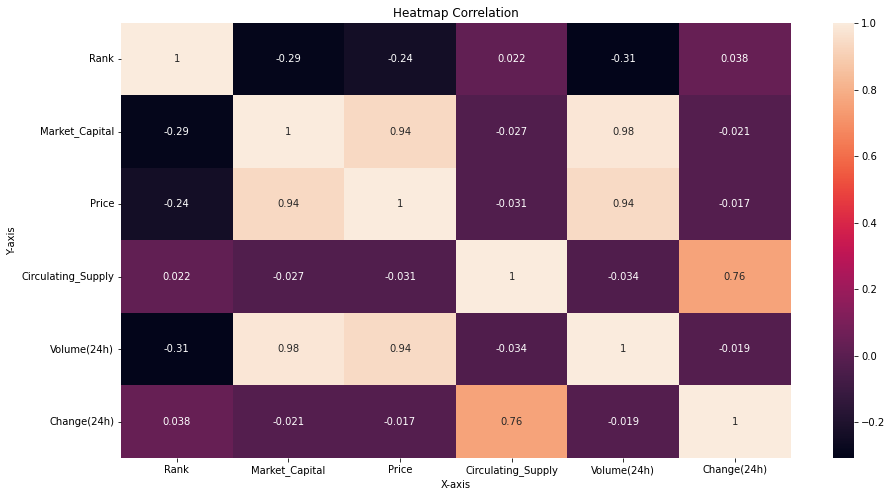

In [14]:
corr=df.corr()
fig = plt.figure(figsize =(15,8))
A6= sns.heatmap(corr , annot=True)
A6.set_xlabel('X-axis')
A6.set_ylabel('Y-axis')
A6.set_title('Heatmap Correlation')


# Barplot - Top 10 currency with highest market capital.
Draw the barplot containing Top 10 currency names with highest Market Capital And Assign to A7 variable.
Instructions:

Use Seaborn
Order the cryptocurrencies is must be in Descending order (i.e,bar corresponding to cryptocurrency with highest market value must be on top of bar plot).
xlabel,ylabel,title must be present
Plot the barplot

Text(0.5, 1.0, 'Barplot containing Top 10 currency names with highest market capital')

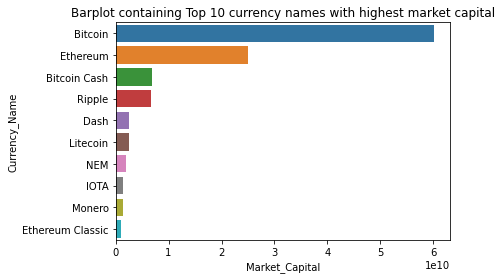

In [15]:
data= df
#data=data.sort_values(by = 'Market_Capital',ascending = False)
#data1=data[['Currency_Name', 'Market_Capital']].head(10)
data1=data.head(10)
#A7= sns.barplot(x=data1['Market_Capital'],y=data1['Currency_Name'])
A7=sns.barplot(data=data1,x='Market_Capital', y='Currency_Name')
A7.set_title('Barplot containing Top 10 currency names with highest market capital')

# Violinplot - Change(24h)
Draw the violinplot that represents the graph of Change(24h). And Assign the variable to A8.
Instructions:

Use seaborn
Change(24h) should be in the y-axis
xlabel,ylabel,title must be present
Plot the violinplot

Text(0.5, 1.0, 'violinplot for Change(24h)')

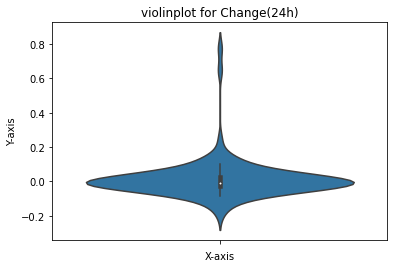

In [16]:
A8= sns.violinplot(y=df['Change(24h)'])
A8.set_xlabel('X-axis')
A8.set_ylabel('Y-axis')
A8.set_title('violinplot for Change(24h)')

# Scatterplot - Price and Market Capital
Draw a scatterplot that represents the relation between Price and Market Capital. And Assign to A9 variable.
Instructions:

use seaborn
Consider data as 50 Cryptocurrencies, with higest Market Value
xlabel,ylabel,title must be present
Plot the Scatterplot

Text(0.5, 1.0, 'Relation between Price and Market Capital')

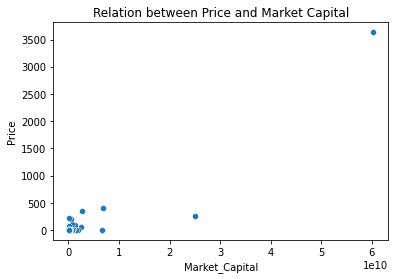

In [17]:
data2=data[['Market_Capital', 'Price']].head(50) ##data is sorted dataframe taken from question no.7
A9=sns.scatterplot(x=data2['Market_Capital'],y=data2['Price'])
A9.set_title('Relation between Price and Market Capital')

# Barplot - Top 10 currency names with Change(24h)
Draw the barplot containing Top 10 currency names with Change(24h) in descending order And Assign to A10 variable.
Instructions:

- Use Seaborn
xlabel,ylabel,title must be present
Plot the barplot


Text(0.5, 1.0, 'Top 10 currency names with Change(24h)')

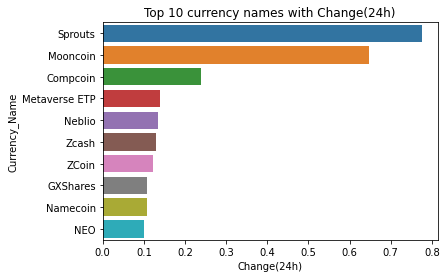

In [18]:
data3=df
data3=data3.sort_values(by= 'Change(24h)',ascending = False)
data3=data3[['Currency_Name','Change(24h)']].head(10)
A10=sns.barplot(x=data3['Change(24h)'],y=data3['Currency_Name'])
A10.set_title('Top 10 currency names with Change(24h)')